In [1]:
from datetime import datetime
import pandas as pd
import calendar
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import numpy as np

df = pd.read_csv("whatsapp_Relli.csv")

# i. Finding the Day :

In [2]:
def Dayfinder(Date):
    date_time_obj3 = datetime.strptime(Date, '%m/%d/%Y')
    return calendar.day_name[date_time_obj3.weekday()]

df["Day"] = df["Date"].apply(Dayfinder)


# ii. Adding LastSeenBeforeCurrentOnlineTime column :

In [3]:
df["LastSeenBeforeCurrentOnlineTime"] = df["OnlineTime"].loc[0]
for i in np.arange(1,df["OnlineTime"].count()):   
    df["LastSeenBeforeCurrentOnlineTime"].loc[i]=df["OfflineTime"].loc[i-1]

# iii. Finding the Duration :

In [4]:
def Durationfinder(OfflineTime,OnlineTime):
    OfflineTime = datetime.strptime(OfflineTime, '%H:%M:%S')
    OnlineTime = datetime.strptime(OnlineTime, '%H:%M:%S')
    return ((OfflineTime-OnlineTime).seconds)/60

df["OnlineDurationInMin"] = df[["OfflineTime","OnlineTime"]].apply(lambda df : Durationfinder(df["OfflineTime"],df["OnlineTime"]),axis=1)
df["AwayDurationInMin"] = df[["OnlineTime","LastSeenBeforeCurrentOnlineTime"]].apply(lambda df : Durationfinder(df["OnlineTime"],df["LastSeenBeforeCurrentOnlineTime"]),axis=1)


# iv. Finding the Hour :

In [5]:
def Hourfinder(OnlineTime):
    date_time_obj4 = datetime.strptime(OnlineTime, '%H:%M:%S')
    return date_time_obj4.hour

df["Hour"] = df["OnlineTime"].apply(Hourfinder)



# v. Converting String to Date :


In [6]:
def DateStrToDateConv(Date):
    return datetime.strptime(Date, '%m/%d/%Y')

df["Date"] = df["Date"].apply(DateStrToDateConv)


# 1.Today's data:

In [7]:
df_Today=df[df["Date"]==df["Date"].max()].sort_values("OnlineTime",ascending=False)
df_Today

#df_Today [["OnlineDurationInMin","AwayDurationInMin","Hour"]].sort_values("AwayDurationInMin",ascending=False)

,Date,OnlineTime,OfflineTime,Day,LastSeenBeforeCurrentOnlineTime,OnlineDurationInMin,AwayDurationInMin,Hour
82,2021-10-05,21:14:35,21:15:57,Tuesday,21:08:17,1.366667,6.300000,21
81,2021-10-05,21:07:35,21:08:17,Tuesday,21:00:23,0.700000,7.200000,21
80,2021-10-05,20:59:42,21:00:23,Tuesday,20:02:52,0.683333,56.833333,20
79,2021-10-05,20:02:27,20:02:52,Tuesday,19:38:51,0.416667,23.600000,20
78,2021-10-05,19:37:41,19:38:51,Tuesday,19:14:53,1.166667,22.800000,19
...,...,...,...,...,...,...,...,...
14,2021-10-05,12:23:12,12:23:59,Tuesday,12:22:55,0.783333,0.283333,12
13,2021-10-05,12:22:21,12:22:55,Tuesday,12:18:04,0.566667,4.283333,12
12,2021-10-05,12:17:25,12:18:04,Tuesday,12:17:04,0.650000,0.350000,12
11,2021-10-05,12:16:09,12:17:04,Tuesday,12:07:04,0.916667,9.083333,12


<AxesSubplot:xlabel='Hour_Column', ylabel='OnlineDurationInMin'>

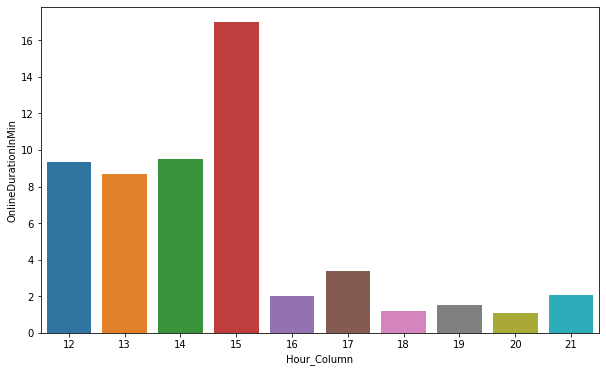

In [8]:
df_Today_GroupbyHour = df_Today.groupby("Hour").sum("OnlineDurationInMin").sort_values("OnlineDurationInMin",ascending=False)
df_Today_GroupbyHour["Hour_Column"] = df_Today_GroupbyHour.index
plt.figure(figsize=(10,6))
sns.barplot(x="Hour_Column",y="OnlineDurationInMin",data=df_Today_GroupbyHour)

# 2. Each day : No.of times logged in,Total/Max/Min time spent  in mins & Last sign out , first sign in for each day :


In [9]:
df_EachDay = pd.DataFrame()
df_EachDay["No.of Times logged in"] = df.groupby("Date").count()["OnlineTime"]
df_EachDay["Total time spent"]=df.groupby("Date").sum()["OnlineDurationInMin"]
df_EachDay["Sign In"] = df.groupby("Date")["OnlineTime"].min()
df_EachDay["Sign Out"] = df.groupby("Date")["OfflineTime"].max()
df_EachDay["Max time spent"]=df.groupby("Date").max()["OnlineDurationInMin"]
df_EachDay["Min time spent"]=df.groupby("Date").min()["OnlineDurationInMin"]
df_EachDay["Sign In Hour"] = df_EachDay["Sign In"].apply(Hourfinder)
df_EachDay["Sign Out Hour"] = df_EachDay["Sign Out"].apply(Hourfinder)
df_EachDay = df_EachDay.reset_index()
df_EachDay=df_EachDay.sort_values("Date",ascending=False)
df_EachDay


,Date,No.of Times logged in,Total time spent,Sign In,Sign Out,Max time spent,Min time spent,Sign In Hour,Sign Out Hour
2,2021-10-05,73,55.816667,12:06:27,21:15:57,4.833333,0.066667,12,21
1,2021-10-04,2,2.283333,07:02:12,08:27:18,1.950000,0.333333,7,8
0,2021-10-03,8,13.616667,13:05:44,20:53:30,4.183333,0.283333,13,20


# 2.a. Days she spend most time, Have to guess why ?

In [10]:
#df_EachDay[df_EachDay["Total time spent"] >=df_EachDay["Total time spent"].median()]

# 2.b. Days she spend Least time, Have to guess why ?

In [11]:
#df_EachDay[df_EachDay["Total time spent"] <df_EachDay["Total time spent"].median()].sort_values("Total time spent")

# 2.c. No.of times logged in each day :

<AxesSubplot:xlabel='No.of Times logged in', ylabel='Date'>

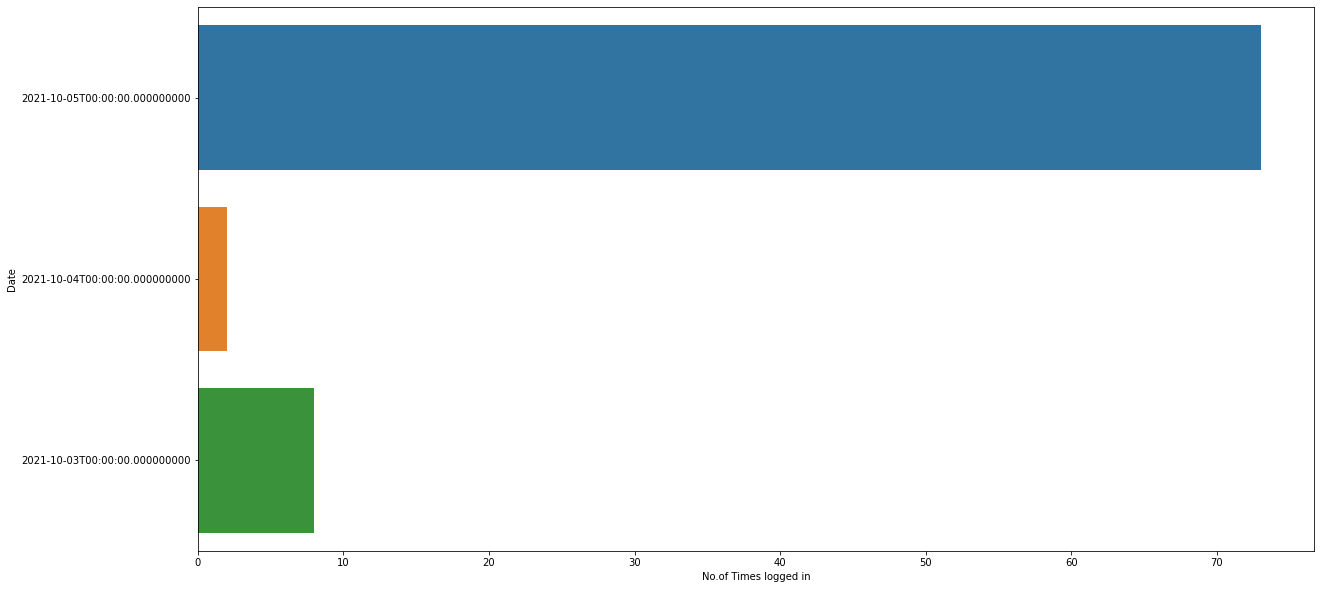

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(y="Date",x="No.of Times logged in",data=df_EachDay)

# 2.d. Total time spent each day :

<AxesSubplot:xlabel='Total time spent', ylabel='Date'>

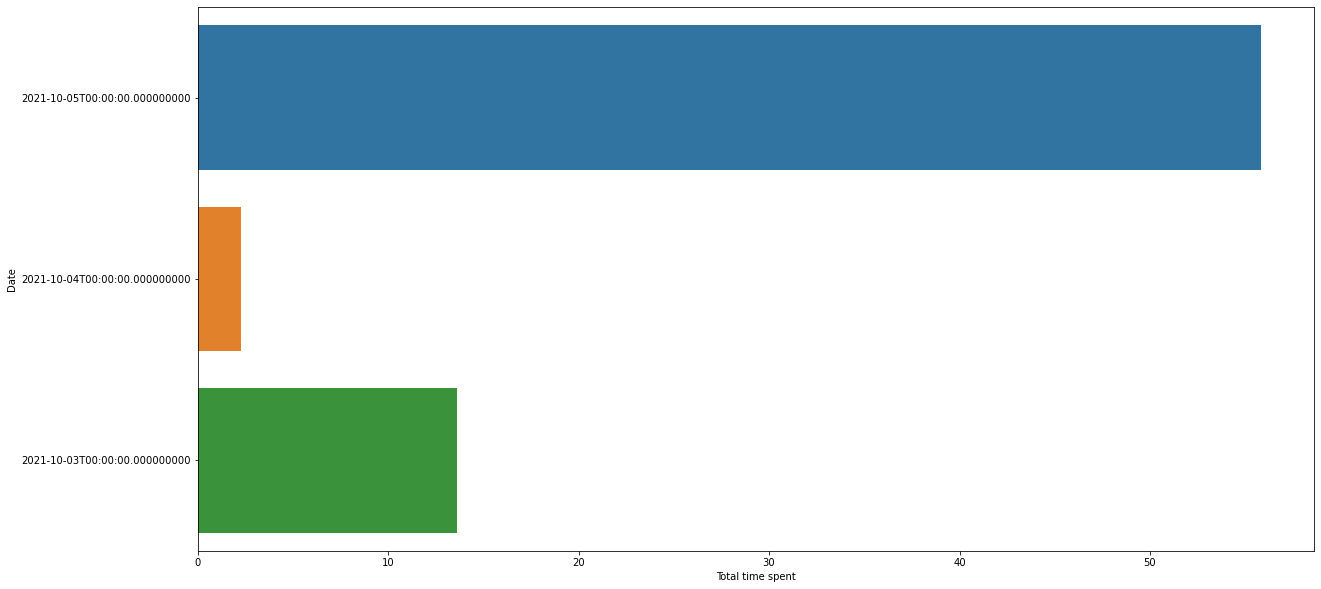

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(y="Date",x="Total time spent",data=df_EachDay)

# 2.e. Total time spent each day in line plot :

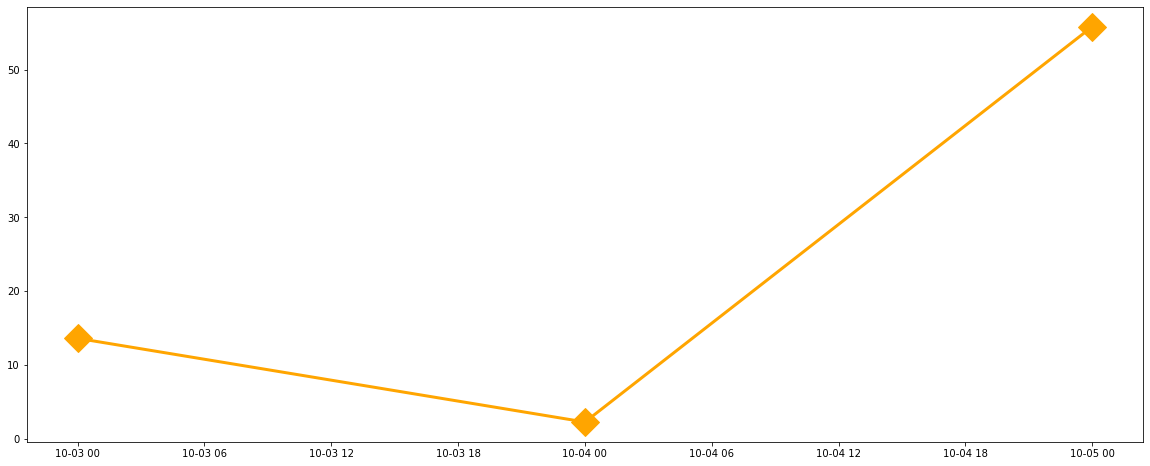

In [14]:
plt.figure(figsize=(20,8))
plt.plot("Date","Total time spent",data=df_EachDay,marker = 'D',linewidth = 3,color = "orange",markersize= 20)

In [15]:
No_OfDays =  df_EachDay["Date"].nunique()
import array as arr
df_arr = arr.array('f')
sum=0
for i in np.arange(0,No_OfDays):
    for j in np.arange(0,i+1):
        temp= df_EachDay.iloc[j]["Total time spent"]
        sum = sum+temp
    Avg = sum/(i+1)
    df_arr.append(round(Avg, 2))
    sum=0
series = pd.Series(df_arr) 
df_AvgTimespentTrend = pd.DataFrame()
df_AvgTimespentTrend["Avg"] = series
df_AvgTimespentTrend["Date"] = df_EachDay["Date"].sort_values(ascending=False)
#plt.figure(figsize=(20,8))
#plt.plot("Date","Avg",data=df_AvgTimespentTrend,marker = 'D',linewidth = 3,color = "orange",markersize= 20)
#plt.xlabel("Date")
#plt.ylabel("Avg online time Trend")

# 2.f. Overall average of time spent , max time spent, min time spent :

In [16]:
df_OverallAvg = df_EachDay.median()
df_OverallAvg

<ipython-input-16-42bb68b678d9>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_OverallAvg = df_EachDay.median()


No.of Times logged in     8.000000
Total time spent         13.616667
Max time spent            4.183333
Min time spent            0.283333
Sign In Hour             12.000000
Sign Out Hour            20.000000
dtype: float64

# 3. Most Active, Least Active :

#    a. Most active (**Hour is important.)

In [17]:
df_Most_Least_Active = df.groupby("Hour").sum("OnlineDurationInMin")
df_Most_Least_Active = df_Most_Least_Active.reset_index()
df_Most_Least_Active["OnlineDurationInMin"] = df_Most_Least_Active["OnlineDurationInMin"] /df["Date"].nunique()
df_Most_Least_Active=df_Most_Least_Active.sort_values("OnlineDurationInMin",ascending=False)
df_Most_Least_Active = df_Most_Least_Active[["Hour","OnlineDurationInMin"]]
df_Most_Least_Active.head()

,Hour,OnlineDurationInMin
5,15,5.661111
3,13,3.805556
4,14,3.172222
10,20,3.127778
2,12,3.122222


#    b. Least active (**Hour is important.)

In [18]:
df_Most_Least_Active = df_Most_Least_Active.sort_values("OnlineDurationInMin")
df_Most_Least_Active.head()

,Hour,OnlineDurationInMin
1,8,0.111111
8,18,0.405556
0,7,0.650000
6,16,0.666667
11,21,0.688889


# 4.a. Avg duration per hour

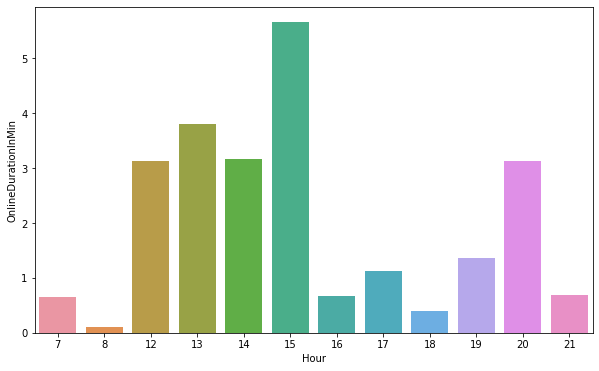

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x="Hour",y="OnlineDurationInMin",data=df_Most_Least_Active)
plt.show()

# 4.b. No .Of Logins Per Hour

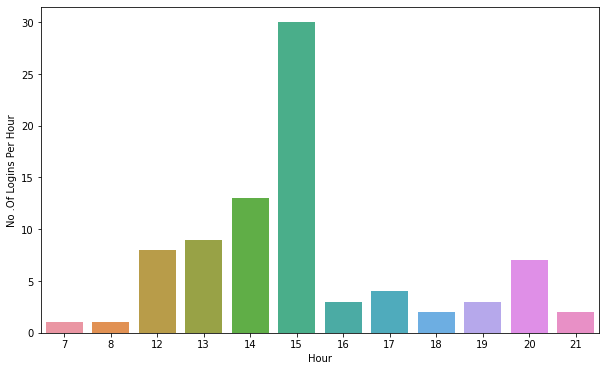

In [20]:
df_NoOfLoginsPerHour = df.groupby("Hour").count()
df_NoOfLoginsPerHour=df_NoOfLoginsPerHour.reset_index()
df_NoOfLoginsPerHour["No .Of Logins Per Hour"] =df_NoOfLoginsPerHour["Date"]
df_NoOfLoginsPerHour = df_NoOfLoginsPerHour[["Hour","No .Of Logins Per Hour"]]
plt.figure(figsize=(10,6))
sns.barplot(y="No .Of Logins Per Hour",x="Hour",data=df_NoOfLoginsPerHour)
plt.show()

# 5. Avg sign in , sign out Times

# a. Avg Sign In Hour 

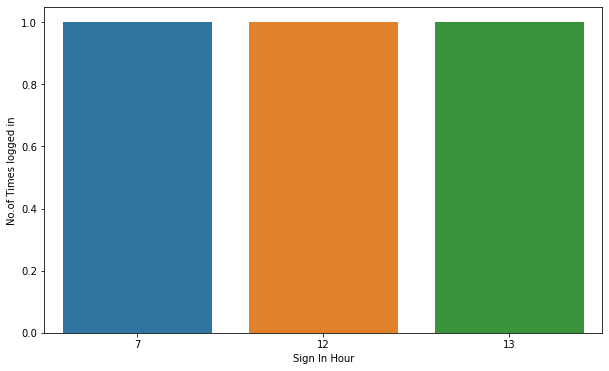

In [21]:
df_EachDay_SignInHour=df_EachDay.groupby("Sign In Hour").count()
df_EachDay_SignInHour=df_EachDay_SignInHour.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(y="No.of Times logged in",x="Sign In Hour",data=df_EachDay_SignInHour)
plt.show()
#plt.figure(figsize=(10,8))
#plt.pie("No.of Times logged in", labels = "Sign In Hour", 
        #startangle=90, shadow = True, 
        #radius = 1.2, autopct = '%1.1f%%',data=df_EachDay_SignInHour)
#plt.show()

# b. Avg Sign out Hour 

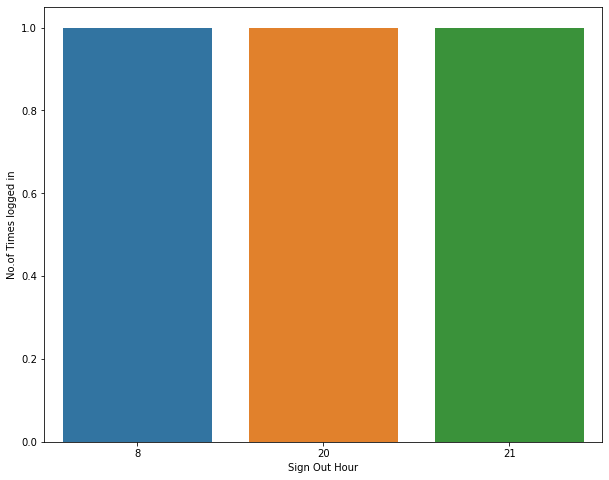

In [22]:
df_EachDay_SignOutHour =df_EachDay.groupby("Sign Out Hour").count()
df_EachDay_SignOutHour = df_EachDay_SignOutHour.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(y="No.of Times logged in",x="Sign Out Hour",data=df_EachDay_SignOutHour)
plt.show()

#plt.figure(figsize=(10,8))

#plt.pie("No.of Times logged in", labels = "Sign Out Hour", 
        #startangle=90, shadow = True,
        #radius = 1.2, autopct = '%1.1f%%',data=df_EachDay_SignOutHour)
#plt.show()

# Plotting & Clustering

plt.scatter(df_EachDay["Total time spent"],df_EachDay["Date"])

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
km = KMeans(n_clusters=3)

df_EachDay_KMeans = df_EachDay[["Total time spent","No.of Times logged in"]]
y_predict = km.fit_predict(df_EachDay_KMeans)
df_EachDay_KMeans["Clusters"] = y_predict

df_EachDay_KMeans_0 = df_EachDay_KMeans[df_EachDay_KMeans["Clusters"] == 0]
df_EachDay_KMeans_1 = df_EachDay_KMeans[df_EachDay_KMeans["Clusters"] == 1]
df_EachDay_KMeans_2 = df_EachDay_KMeans[df_EachDay_KMeans["Clusters"] == 2]

df_EachDay_KMeans_0
df_EachDay_KMeans_1
df_EachDay_KMeans_2

plt.scatter(df_EachDay_KMeans_0["Total time spent"],df_EachDay_KMeans_0["No.of Times logged in"],color = "green")
plt.scatter(df_EachDay_KMeans_1["Total time spent"],df_EachDay_KMeans_1["No.of Times logged in"],color = "orange")
plt.scatter(df_EachDay_KMeans_2["Total time spent"],df_EachDay_KMeans_2["No.of Times logged in"],color = "blue")

plt.xlabel("Total time spent")
plt.ylabel("No.of Times logged in")
plt.legend()

#scaler  = MinMaxScaler()
#scaler.fit(df_EachDay_KMeans["Total time spent"])
#df_EachDay_KMeans["Total time spent"] = scaler.transform(df_EachDay_KMeans["Total time spent"])


plt.figure(figsize=(20,10))
palette ={5: "C0", 6: "C1", 7: "C2", 8: "C3",9: "C4", 10: "C5", 11: "C6", 12: "C7", 13: "C8", 14: "C9", 15: "C10", 16: "C11", 17: "C12", 18: "C13", 19: "C14", 20: "C15", 21: "C16"}
sns.scatterplot(y="OnlineDurationInMin",x="AwayDurationInMin",data=df,hue="Hour",palette=palette,marker = 'D')
plt.xlim((0,25))

sns.scatterplot(y="OnlineDurationInMin",x="AwayDurationInMin",data=df,hue="Hour")
plt.xlim((200,400))

sns.scatterplot(y="OnlineDurationInMin",x="AwayDurationInMin",data=df,hue="Hour")
plt.xlim((400,800))


plt.scatter("OnlineDurationInMin","AwayDurationInMin",data=df)
plt.scatter("OnlineDurationInMin","AwayDurationInMin",data=df)

df1_16 = df.groupby(["Day","Date"]).size().reset_index().sort_values("Day")
df2_16 =df.groupby(["Day","Date"]).sum().reset_index().sort_values("Day")
result = pd.concat([df1_16, df2_16], axis=1, join='inner',)

df_Today=df.sort_values("OnlineTime",ascending=False)
X=df_Today[["Hour","AwayDurationInMin"]]
y=df_Today["OnlineDurationInMin"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

#print(lm.predict(X.loc[[126]]))
#print(y.loc[[126]])

sns.distplot((y_test-predictions))

#sns.barplot(y="No.of Times logged in",x="Sign In Hour",data=df_EachDay_SignInHour)

sns.distplot(df_EachDay_SignInHour["Sign In Hour"])

df_AvgTimespentTrend

No_OfDays =  df_EachDay["Date"].nunique()
import array as arr
df_arr = arr.array('f')
sum=0
for i in np.arange(0,No_OfDays):
    for j in np.arange(0,i+1):
        temp= df_EachDay.iloc[j]["Total time spent"]
        sum = sum+temp
    Avg = sum/(i+1)
    df_arr.append(round(Avg, 2))
    sum=0
series = pd.Series(df_arr) 
df_AvgTimespentTrend = pd.DataFrame()
df_AvgTimespentTrend["Avg"] = series

df_EachDay= df_EachDay.sort_values("Date")
df_EachDay["AvgTimespentTrend"]=df_AvgTimespentTrend["Avg"]
df_EachDay
#series

In [23]:
df_MaxTimespentHour=df.groupby("Date").max("OnlineDurationInMin")
df_MaxTimespentHour=df_MaxTimespentHour.reset_index()
df_MaxTimespentHour=pd.merge(df,df_MaxTimespentHour,on='OnlineDurationInMin')
plt.figure(figsize=(10,6))
#sns.barplot(y="Date_x",x="Hour_x",data=df_MaxTimespentHour)
plt.show()
df_MaxTimespentHour

<Figure size 720x432 with 0 Axes>

,Date_x,OnlineTime,OfflineTime,Day,LastSeenBeforeCurrentOnlineTime,OnlineDurationInMin,AwayDurationInMin_x,Hour_x,Date_y,AwayDurationInMin_y,Hour_y
0,2021-10-03,20:48:11,20:52:22,Sunday,20:47:14,4.183333,0.95,20,2021-10-03,391.483333,20
1,2021-10-04,07:02:12,07:04:09,Monday,20:53:30,1.950000,608.70,7,2021-10-04,608.700000,8
2,2021-10-05,15:31:41,15:36:31,Tuesday,15:31:38,4.833333,0.05,15,2021-10-05,219.150000,21


In [24]:
df_MaxTimespentHour

,Date_x,OnlineTime,OfflineTime,Day,LastSeenBeforeCurrentOnlineTime,OnlineDurationInMin,AwayDurationInMin_x,Hour_x,Date_y,AwayDurationInMin_y,Hour_y
0,2021-10-03,20:48:11,20:52:22,Sunday,20:47:14,4.183333,0.95,20,2021-10-03,391.483333,20
1,2021-10-04,07:02:12,07:04:09,Monday,20:53:30,1.950000,608.70,7,2021-10-04,608.700000,8
2,2021-10-05,15:31:41,15:36:31,Tuesday,15:31:38,4.833333,0.05,15,2021-10-05,219.150000,21


In [25]:
df_EachDay.sort_values("Total time spent",ascending=False)

,Date,No.of Times logged in,Total time spent,Sign In,Sign Out,Max time spent,Min time spent,Sign In Hour,Sign Out Hour
2,2021-10-05,73,55.816667,12:06:27,21:15:57,4.833333,0.066667,12,21
0,2021-10-03,8,13.616667,13:05:44,20:53:30,4.183333,0.283333,13,20
1,2021-10-04,2,2.283333,07:02:12,08:27:18,1.950000,0.333333,7,8
